# TP Apprentissage non-supervisé
## Clustering
## Laure FEUILLET - Maël PLANTEC

## I - Jeux de données

In [1]:
from scipy.io import arff
import numpy as np
import matplotlib.pyplot as plt

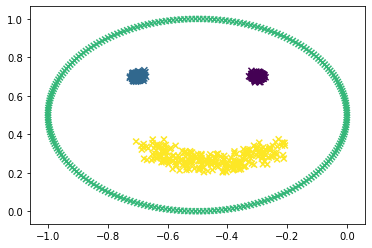

In [2]:
smile_data = arff.loadarff(open('smile1.arff', 'rt'))
smile = np.array(smile_data)[0]
plt.scatter(smile['a0'], smile['a1'], c=smile['class'], marker='x')
plt.show()

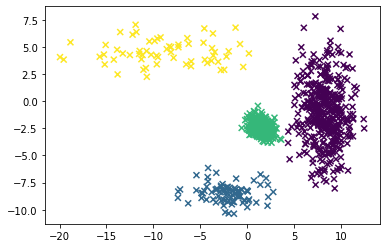

In [3]:
d2c4_data = arff.loadarff(open('2d-4c-no4.arff', 'rt'))
d2c4 = np.array(d2c4_data)[0]
plt.scatter(d2c4['a0'], d2c4['a1'], c=d2c4['class'], marker='x')
plt.show()

## II - Clustering k-Means
Le dataset `smile` possède des composantes connexes bien identifiées, avec des densités variables : les yeux sont plus denses que la bouche par exemple. 

In [4]:
from sklearn import cluster
from sklearn import metrics

In [6]:
d2c4_train = list(zip(d2c4['a0'], d2c4['a1']))

In [7]:
kmeans_d2c4  = cluster.KMeans(n_clusters=len(np.unique(d2c4['class'])), init='k-means++')
kmeans_d2c4.fit(d2c4_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

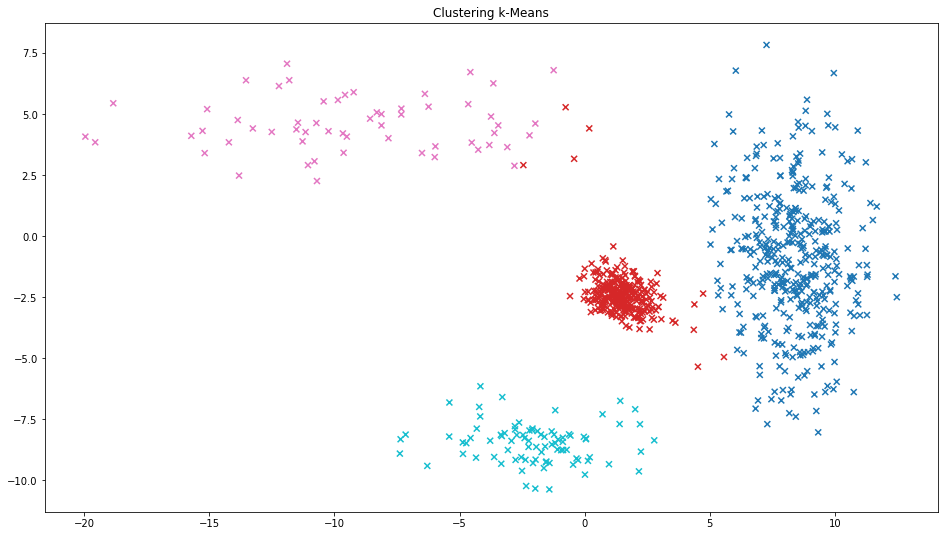

In [9]:
plt.figure(figsize=(16, 9))
plt.scatter(d2c4['a0'], d2c4['a1'], c=kmeans_d2c4.labels_, marker='x', cmap='tab10')
plt.title("Clustering k-Means")
plt.show()

In [10]:
range_clusters = range(2, 11)
kmeans_nb_clusters = []
for nb_clusters in range_clusters:
    kmeans  = cluster.KMeans(n_clusters=nb_clusters, init='k-means++')
    kmeans.fit(d2c4_train)
    # Indice de Davies Bouldin
    db = metrics.davies_bouldin_score(d2c4_train, kmeans.labels_)
    # Coefficient de silhouette
    silhouette = metrics.silhouette_score(d2c4_train, kmeans.labels_)
    kmeans_nb_clusters.append((nb_clusters, kmeans.labels_, db, silhouette))

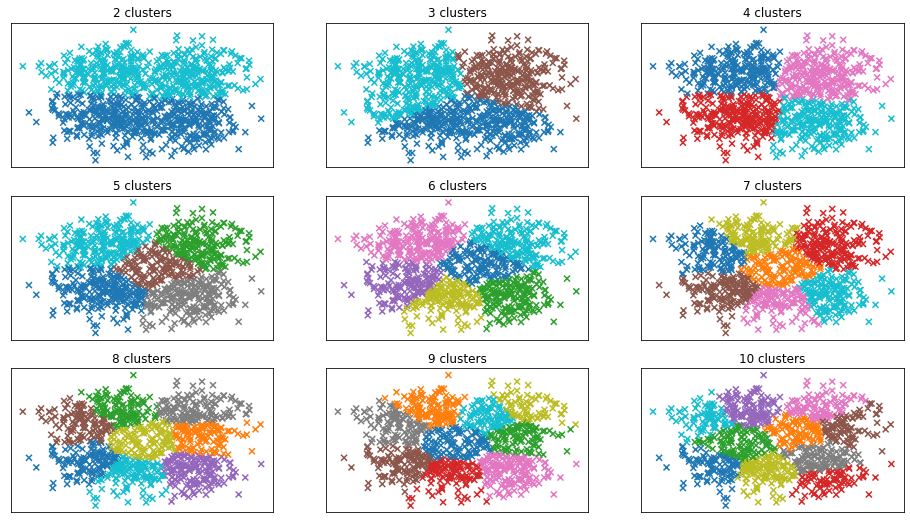

In [112]:
plt.figure(figsize=(16, 9))

i=0
for res in kmeans_nb_clusters:
    subplot = plt.subplot(3, 3, i+1)
    subplot.get_xaxis().set_visible(False)
    subplot.get_yaxis().set_visible(False)
    plt.scatter(d2c4['a0'], d2c4['a1'], c=res[1], marker='x', cmap='tab10')
    plt.title(f"{res[0]} clusters")
    i = i + 1
    
plt.show()

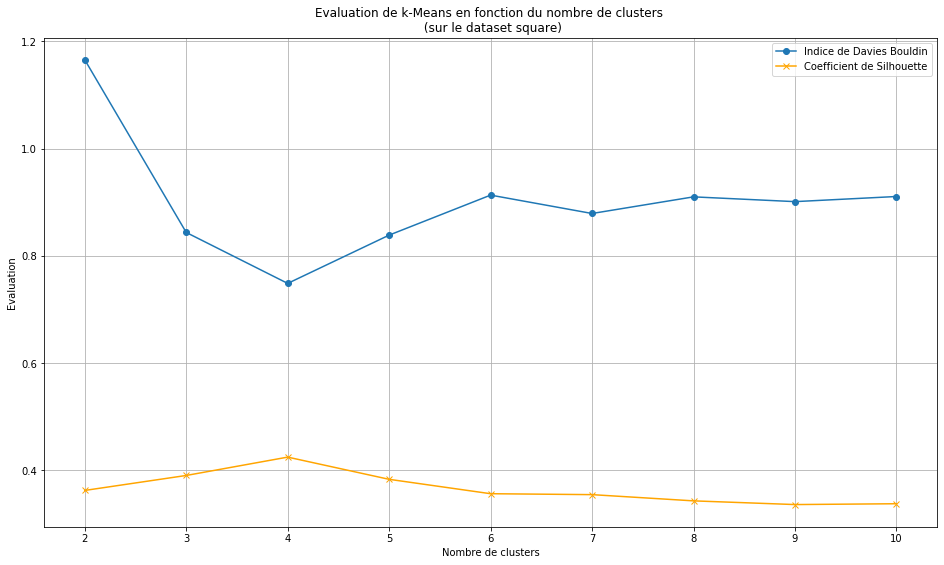

In [113]:
kmeans_nb_clusters_zip = list(zip(*kmeans_nb_clusters))

plt.figure(figsize=(16,9))
plt.plot(kmeans_nb_clusters_zip[0], kmeans_nb_clusters_zip[2], 'o-', label='Indice de Davies Bouldin')
plt.plot(kmeans_nb_clusters_zip[0], kmeans_nb_clusters_zip[3], 'x-', label='Coefficient de Silhouette', color='orange')
plt.title("Evaluation de k-Means en fonction du nombre de clusters \n (sur le dataset square)")
plt.xlabel('Nombre de clusters')
plt.ylabel('Evaluation')
plt.legend()
plt.grid()
plt.show()

On remarque que... 

In [114]:
range_clusters = range(2, 11)
kmeans_nb_clusters = []
for nb_clusters in range_clusters:
    kmeans  = cluster.KMeans(n_clusters=nb_clusters, init='k-means++')
    kmeans.fit(smile_train)
    # Indice de Davies Bouldin
    db = metrics.davies_bouldin_score(smile_train, kmeans.labels_)
    # Coefficient de silhouette
    silhouette = metrics.silhouette_score(smile_train, kmeans.labels_)
    kmeans_nb_clusters.append((nb_clusters, kmeans.labels_, db, silhouette))

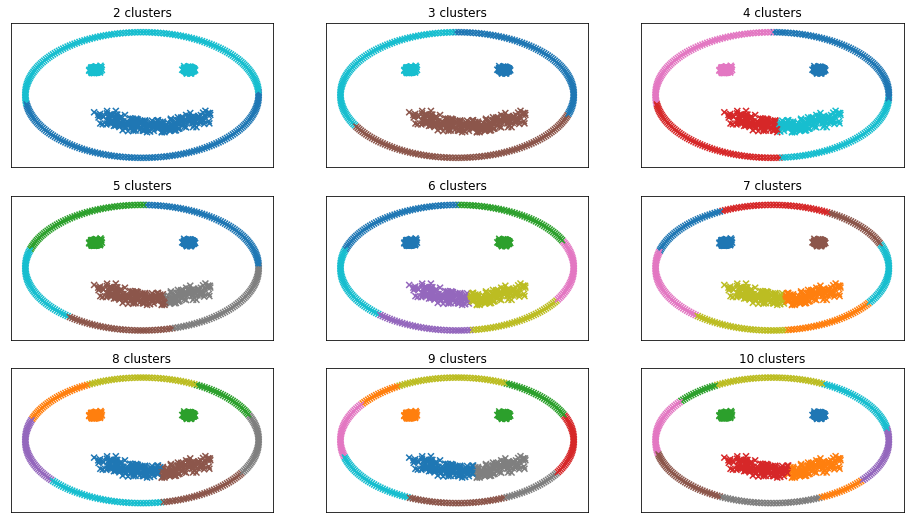

In [115]:
plt.figure(figsize=(16, 9))

i=0
for res in kmeans_nb_clusters:
    subplot = plt.subplot(3, 3, i+1)
    subplot.get_xaxis().set_visible(False)
    subplot.get_yaxis().set_visible(False)
    plt.scatter(smile['a0'], smile['a1'], c=res[1], marker='x', cmap='tab10')
    plt.title(f"{res[0]} clusters")
    i = i + 1
    
plt.show()

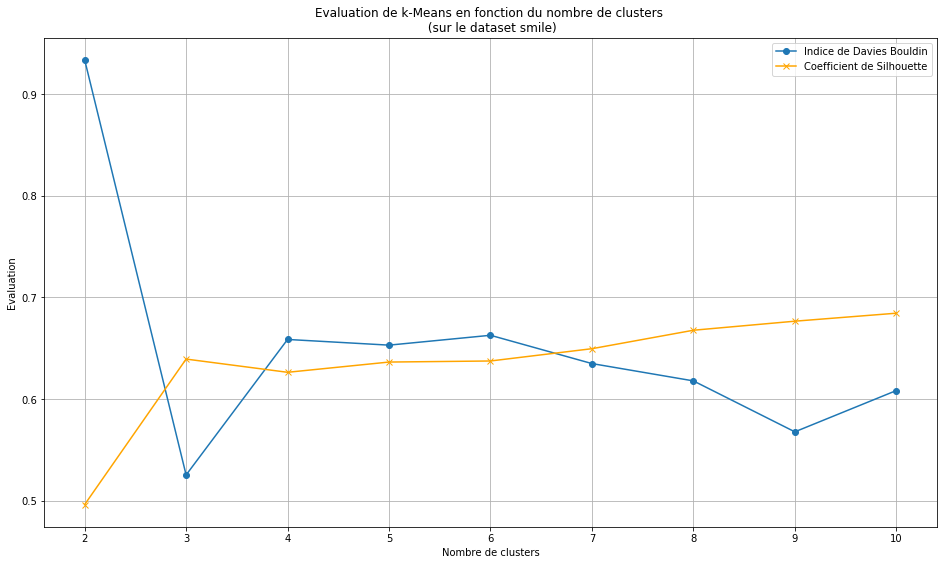

In [116]:
kmeans_nb_clusters_zip = list(zip(*kmeans_nb_clusters))

plt.figure(figsize=(16,9))
plt.plot(kmeans_nb_clusters_zip[0], kmeans_nb_clusters_zip[2], 'o-', label='Indice de Davies Bouldin')
plt.plot(kmeans_nb_clusters_zip[0], kmeans_nb_clusters_zip[3], 'x-', label='Coefficient de Silhouette', color='orange')
plt.title("Evaluation de k-Means en fonction du nombre de clusters \n (sur le dataset smile)")
plt.xlabel('Nombre de clusters')
plt.ylabel('Evaluation')
plt.legend()
plt.grid()
plt.show()

Non, nous n'arrivons pas à retrouver le résultat précédent (4 clusters). Cela est tout à fait normal car le dataset utilisé n'est pas valable pour kmeans (non connexe).

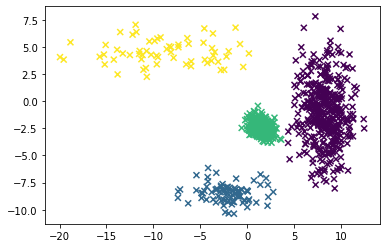

In [2]:
d2c4_data = arff.loadarff(open('2d-4c-no4.arff', 'rt'))
d2c4 = np.array(d2c4_data)[0]
plt.scatter(d2c4['a0'], d2c4['a1'], c=d2c4['class'], marker='x')
plt.show()

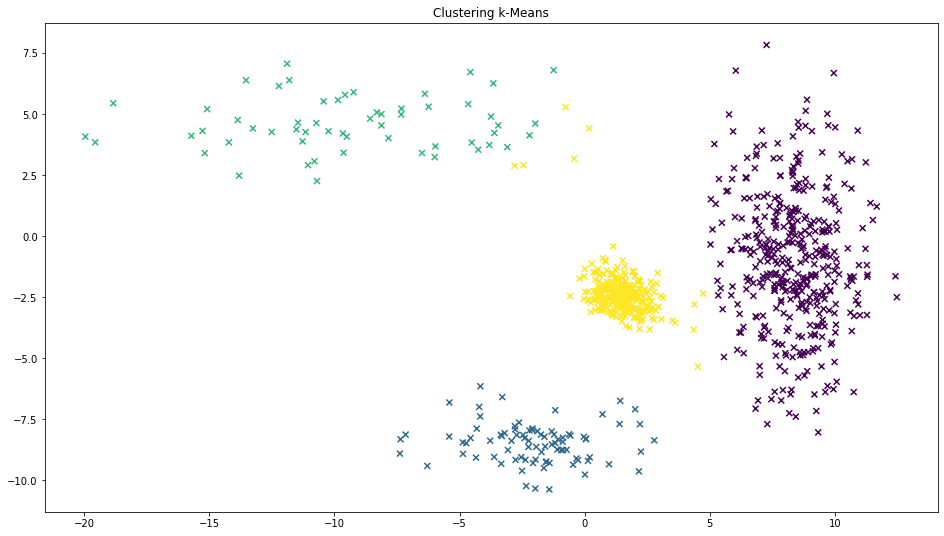

In [7]:
d2c4_train = list(zip(d2c4['a0'], d2c4['a1']))
kmeans_d2c4  = cluster.KMeans(n_clusters=len(np.unique(d2c4['class'])), init='k-means++')
kmeans_d2c4.fit(d2c4_train)

plt.figure(figsize=(16, 9))
plt.scatter(d2c4['a0'], d2c4['a1'], c=kmeans_d2c4.labels_, marker='x')
plt.title("Clustering k-Means")
plt.show()